### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load Dataset

In [2]:
df = pd.read_csv(r"C:\Users\USER\Downloads\combined_data (1).csv")
df

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2138035,80,590930,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2138036,80,1187988,2,0,0,0,0,0,0.000000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2138037,80,10,1,9,6,54,6,6,6.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2138038,138,19,10,0,2370,0,237,237,237.000000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


### Data Inspection and Cleaning

In [3]:
df.shape

(2138040, 79)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2138040 entries, 0 to 2138039
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [5]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [6]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df.isnull().sum()

 Destination Port                 0
 Flow Duration                    0
 Total Fwd Packets                0
 Total Backward Packets           0
Total Length of Fwd Packets       0
 Total Length of Bwd Packets      0
 Fwd Packet Length Max            0
 Fwd Packet Length Min            0
 Fwd Packet Length Mean           0
 Fwd Packet Length Std            0
Bwd Packet Length Max             0
 Bwd Packet Length Min            0
 Bwd Packet Length Mean           0
 Bwd Packet Length Std            0
Flow Bytes/s                    350
 Flow Packets/s                   0
 Flow IAT Mean                    0
 Flow IAT Std                     0
 Flow IAT Max                     0
 Flow IAT Min                     0
Fwd IAT Total                     0
 Fwd IAT Mean                     0
 Fwd IAT Std                      0
 Fwd IAT Max                      0
 Fwd IAT Min                      0
Bwd IAT Total                     0
 Bwd IAT Mean                     0
 Bwd IAT Std                

In [7]:
# Flow Bytes/s  has 350 missing values which is insignificant and will be dropped

In [8]:
df.dropna(inplace=True)

#Recheck null Values
df['Flow Bytes/s'].isnull().sum()

0

### Exploration of Different Intrusions

In [9]:
df[' Label'].unique()

array(['BENIGN', 'PortScan', 'Web Attack � Brute Force',
       'Web Attack � XSS', 'Web Attack � Sql Injection', 'FTP-Patator',
       'SSH-Patator', 'DDoS', 'Bot', 'Infiltration'], dtype=object)

In [10]:
# Count occurrences of each category
category_counts = df[' Label'].value_counts()
category_percentages = (category_counts / category_counts.sum()) * 100
Cat_Percentage = category_percentages.round(2).astype(str) + '%'
Cat_Percentage 

 Label
BENIGN                        85.73%
PortScan                       7.43%
DDoS                           5.99%
FTP-Patator                    0.37%
SSH-Patator                    0.28%
Bot                            0.09%
Web Attack � Brute Force       0.07%
Web Attack � XSS               0.03%
Infiltration                    0.0%
Web Attack � Sql Injection      0.0%
Name: count, dtype: object

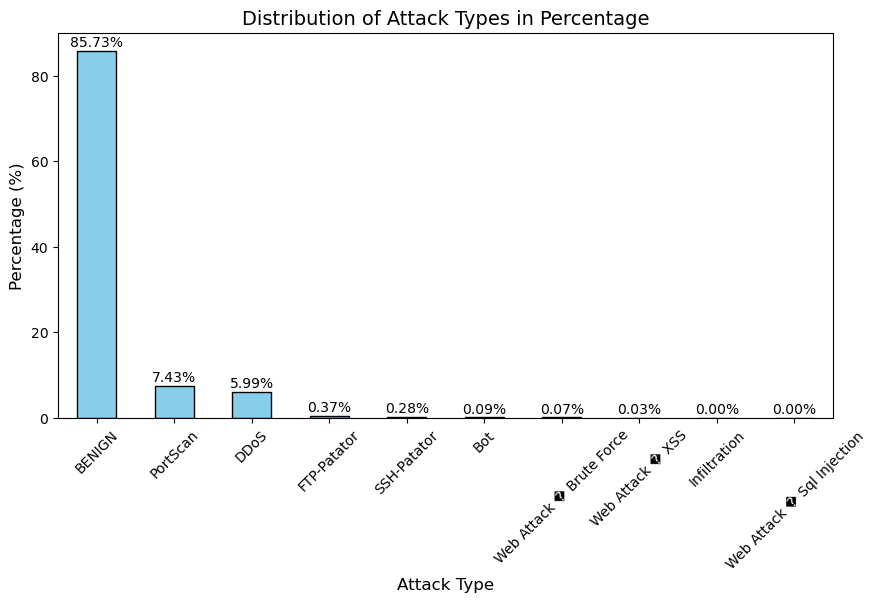

In [11]:
# Create a bar chart

# Count occurrences of each category
category_counts = df[' Label'].value_counts()

# Convert to percentage
category_percentages = (category_counts / category_counts.sum()) * 100

# Plot bar chart
plt.figure(figsize=(10, 5))
category_percentages.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel("Attack Type", fontsize=12)
plt.ylabel("Percentage (%)", fontsize=12)
plt.title("Distribution of Attack Types in Percentage", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show percentage values on bars
for index, value in enumerate(category_percentages):
    plt.text(index, value + 1, f"{value:.2f}%", ha='center', fontsize=10)

# Show plot
plt.show()

In [12]:
#Convert Labels to Binary for Anomaly Detection

df["Anomaly"] = df[" Label"].apply(lambda x: 0 if x == "BENIGN" else 1)

df["Anomaly"] = df["Anomaly"].map({0: "Benign", 1: "Anomalous"})

print(df["Anomaly"].value_counts())

Anomaly
Benign       1832716
Anomalous     304974
Name: count, dtype: int64


In [13]:
df["Anomaly"] = df[" Label"].apply(lambda x: 0 if x == "BENIGN" else 1)

print(df.columns)  # Verify "Anomaly" is there


Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', ' Fwd Packet Length Mean',
       ' Fwd Packet Length Std', 'Bwd Packet Length Max',
       ' Bwd Packet Length Min', ' Bwd Packet Length Mean',
       ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s',
       ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min',
       'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max',
       ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std',
       ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', '

In [14]:
print(df.head())  # Display first few rows
print("Anomaly" in df.columns)  # Should return True

    Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       44                         2664   
1                       44                         2664   
2                        1                            0   
3                       42                         2728   
4                        2                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          6954                     456   
1                          6954                     456   
2                             0                       0   
3                          6634                 

In [15]:
anomaly_counts = df["Anomaly"].value_counts()
print(anomaly_counts)

Anomaly
0    1832716
1     304974
Name: count, dtype: int64


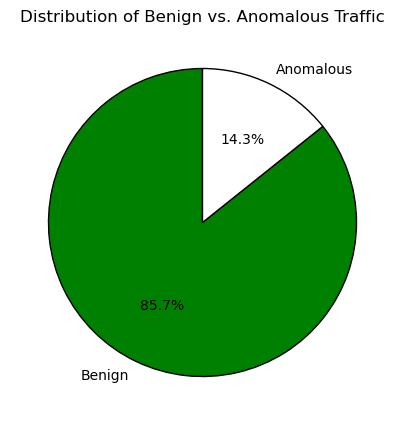

In [16]:
# Plot pie chart
plt.figure(figsize=(5, 5))
plt.pie(anomaly_counts.values, labels=['Benign', 'Anomalous'], 
        autopct='%1.1f%%', colors=['green', 'white'], startangle=90, 
        wedgeprops={'edgecolor': 'black'})

# Add title
plt.title("Distribution of Benign vs. Anomalous Traffic")

# Show plot
plt.show()

### Correlation Analysis

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
encoder = LabelEncoder()

# Apply encoding
df[" Label"] = encoder.fit_transform(df[" Label"])

# Check the mapping of labels to numbers
label_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Label Encoding Mapping:", label_mapping)

# Now you can perform numerical operations
print(df[" Label"].head())

Label Encoding Mapping: {'BENIGN': 0, 'Bot': 1, 'DDoS': 2, 'FTP-Patator': 3, 'Infiltration': 4, 'PortScan': 5, 'SSH-Patator': 6, 'Web Attack � Brute Force': 7, 'Web Attack � Sql Injection': 8, 'Web Attack � XSS': 9}
0    0
1    0
2    0
3    0
4    0
Name:  Label, dtype: int32


In [18]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
df[" Label"] = df[" Label"].astype("category").cat.codes

correlations = df.corr()
correlations = correlations[" Label"].sort_values(ascending=False)
print(correlations)  # Print ensures full output

 Label                          1.000000
Anomaly                         0.912129
 PSH Flag Count                 0.407745
 Packet Length Variance         0.143112
 Bwd Packets/s                  0.133906
 Bwd Packet Length Std          0.132571
Init_Win_bytes_forward          0.131165
Bwd Packet Length Max           0.105975
 Packet Length Std              0.096356
 Bwd Packet Length Mean         0.086504
 Avg Bwd Segment Size           0.086504
 Down/Up Ratio                  0.084510
 Max Packet Length              0.080305
 Packet Length Mean             0.046359
 Average Packet Size            0.046015
 Idle Std                       0.040457
 Fwd IAT Std                    0.004954
 min_seg_size_forward           0.001093
 Bwd Header Length              0.000701
 Fwd Header Length              0.000531
 Fwd Header Length.1            0.000531
 Subflow Bwd Bytes             -0.002313
 Total Length of Bwd Packets   -0.002313
 act_data_pkt_fwd              -0.002421
 Subflow Bwd Pac

**Deal with columns with only 1 unique value**

In [19]:
unique_counts = df.nunique()  # Get the count of unique values in each column
single_value_columns = unique_counts[unique_counts == 1].index  # Filter columns with only 1 unique value

print("Columns with a single unique value:", single_value_columns.tolist())


Columns with a single unique value: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']


In [20]:
df = df.loc[:, df.nunique() > 1]

In [21]:
# Re Check Correlation

correlations = df.corr()
correlations = correlations[" Label"].sort_values(ascending=False)
print(correlations)  # Print ensures full output


 Label                          1.000000
Anomaly                         0.912129
 PSH Flag Count                 0.407745
 Packet Length Variance         0.143112
 Bwd Packets/s                  0.133906
 Bwd Packet Length Std          0.132571
Init_Win_bytes_forward          0.131165
Bwd Packet Length Max           0.105975
 Packet Length Std              0.096356
 Bwd Packet Length Mean         0.086504
 Avg Bwd Segment Size           0.086504
 Down/Up Ratio                  0.084510
 Max Packet Length              0.080305
 Packet Length Mean             0.046359
 Average Packet Size            0.046015
 Idle Std                       0.040457
 Fwd IAT Std                    0.004954
 min_seg_size_forward           0.001093
 Bwd Header Length              0.000701
 Fwd Header Length              0.000531
 Fwd Header Length.1            0.000531
 Subflow Bwd Bytes             -0.002313
 Total Length of Bwd Packets   -0.002313
 act_data_pkt_fwd              -0.002421
 Subflow Bwd Pac

### Model Training

In [22]:
from sklearn.model_selection import train_test_split

# Define Features and Target

X = df.drop(columns=[" Label"])  # Drop the target column
y = df[" Label"]  # Target variable

In [23]:
# Split Data into Training & Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Verify Spiliting

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1496383, 71)
Testing set size: (641307, 71)


In [25]:
# Check for NaN values
print("Missing values in X:", np.isnan(X).sum().sum())

# Check for infinite values
print("Infinite values in X:", np.isinf(X).sum().sum())

Missing values in X: 0
Infinite values in X: 2440


In [26]:
# Replace inf values with NaN
X.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill NaN values with the median of each column
X.fillna(X.median(), inplace=True)

# To deal with extreemly large value
X = np.clip(X, -1e10, 1e10)  # Adjust the range as needed

# Retry the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


*Import Models*

In [28]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)  # Fit model after fixing data issues

LogisticRegression()

In [ ]:
## Get prediction for testing data(X_Test)
y_pred = logistic_model.predict(X_test)

# Create a DataFrame to compare actual vs predicted values
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows
print(results_df.head(20))

In [30]:
from sklearn.metrics import *
## Compare both y_pred and y_test
accuracy = accuracy_score(y_test,y_pred)*100.
confusion_mat = confusion_matrix(y_test,y_pred)
print("Accuracy is",accuracy)
print("Confusion Matrix")
print(confusion_mat)

Accuracy is 99.90807834625227
Confusion Matrix
[[366498      0      0      0      2      0      0      0      0      0]
 [     0    230      2      0      0    102     32     12      0      0]
 [     0      0  25650      0      0      8      0      0      0      0]
 [     0      0      3   1552      0      0      1      1      0      0]
 [     0      0      1      1      4      0      0      0      0      0]
 [     0      6     27      0      0  31770      1      0      0      0]
 [     0      4      1      3      0      4   1176      0      0      0]
 [     0      0      0      0      0      1     43    262      0      0]
 [     0      0      0      0      0      0      3      0      0      0]
 [     0      2      6      0      0      0      0    127      0      3]]


**Fitting Different Models**

In [31]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn import tree
from sklearn.model_selection import cross_val_score
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import *
from sklearn.tree import *

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#from sklearn.neighbors import KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier

In [33]:
# Function to split data into training and testing sets
def split_data(X, y, test_size=0.3, random_state=None):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

# Function to train a classification model
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train)

# Function to evaluate a classification model
def evaluate_model(model, X, y, dataset_name):
    accuracy = accuracy_score(y, model.predict(X))
    confusion_matrix_result = confusion_matrix(y, model.predict(X))
    classification = classification_report(y, model.predict(X))
    
    print(f'============================== {dataset_name} Model Evaluation ==============================')
    print()
    print("Model Accuracy:\n", accuracy)
    print()
    print("Confusion matrix:\n", confusion_matrix_result)
    print()
    print("Classification report:\n", classification)
    print()

    
models = [
    ('Naive Baye Classifier', BernoulliNB()),
    ('Decision Tree Classifier', DecisionTreeClassifier(criterion='entropy', random_state=0)),
    #('KNeighborsClassifier', KNeighborsClassifier(n_jobs=-1)),
    #('LogisticRegression', LogisticRegression(n_jobs=-1, random_state=0))
]

# Iterate through models
for model_name, model in models:
    train_model(model, X_train, y_train)
    evaluate_model(model, X_train, y_train, f'Training - {model_name}')
    evaluate_model(model, X_test, y_test, f'Test - {model_name}')

============================== Training - Naive Baye Classifier Model Evaluation ==============================

Model Accuracy:
 0.8805351804985756

Confusion matrix:
 [[1276394       0     281       0  147832       0     259     142   19085
    22223]
 [      0    1138       0       0       2     390       4       0      54
        0]
 [      1    7791   93120     942       0       0       0     503      12
        0]
 [      0      13       0    6368       0       0       0       0       0
        0]
 [      0       2       1       1      26       0       0       0       0
        0]
 [    205     871      69       0       2  125938       0      17      18
        6]
 [      0    2321       0      11       2      15    2359       0       1
        0]
 [      0     118       0       0      54       0       0      20      45
      964]
 [      0       7       0       0       0       0       0       0      11
        0]
 [      0      17       0       0      12       0       0       4 

### For ANN

In [34]:
# Import Tensor Flow
import tensorflow as tf 
ann = tf.keras.models.Sequential()

In [35]:
# Define the Model
ann.add(tf.keras.layers.Dense(units=6,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=10,activation='sigmoid'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [36]:
# Compile the model
ann.compile(optimizer ='adam' , loss='categorical_crossentropy' , metrics= ['accuracy'])

In [37]:
# Add Early Stoping to prevent Overfitting

from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

In [ ]:
#training the ann on training set
history = ann.fit(X_train,y_train,batch_size=32,epochs=30,callbacks=[early_stopping])

Epoch 1/30


C:\Users\USER\Documents\Anaconda\Lib\site-packages\keras\src\losses\losses.py:33: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


53443/53443 ━━━━━━━━━━━━━━━━━━━━ 129s 2ms/step - accuracy: 0.8477 - loss: 0.0000e+00
Epoch 2/30
   27/53443 ━━━━━━━━━━━━━━━━━━━━ 1:43 2ms/step - accuracy: 0.8470 - loss: 0.0000e+00    

C:\Users\USER\Documents\Anaconda\Lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


53443/53443 ━━━━━━━━━━━━━━━━━━━━ 122s 2ms/step - accuracy: 0.8579 - loss: 0.0000e+00
Epoch 3/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 121s 2ms/step - accuracy: 0.8581 - loss: 0.0000e+00
Epoch 4/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 122s 2ms/step - accuracy: 0.8580 - loss: 0.0000e+00
Epoch 5/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 110s 2ms/step - accuracy: 0.8578 - loss: 0.0000e+00
Epoch 6/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 164s 2ms/step - accuracy: 0.8580 - loss: 0.0000e+00
Epoch 7/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - accuracy: 0.8581 - loss: 0.0000e+00
Epoch 8/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 157s 3ms/step - accuracy: 0.8580 - loss: 0.0000e+00
Epoch 9/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 130s 2ms/step - accuracy: 0.8585 - loss: 0.0000e+00
Epoch 10/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 124s 2ms/step - accuracy: 0.8582 - loss: 0.0000e+00
Epoch 11/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 148s 3ms/step - accuracy: 0.8580 - loss: 0.0000e+00
Epoch 12/30
53443/53443 ━━━━━━━━━━━━━━━━━━━━ 175s